In [17]:
# All imports
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.utils import image_dataset_from_directory
import numpy as np

In [7]:
# Preparing the Data
img_height, img_width = 100, 100
batch_size = 20

train_ds = image_dataset_from_directory(
    "fruits/train",
    image_size=(img_height, img_width),
    batch_size=batch_size,
)
val_ds = image_dataset_from_directory(
    "fruits/validation",
    image_size=(img_height, img_width),
    batch_size=batch_size
)
test_ds = image_dataset_from_directory(
    "fruits/test",
    image_size= (img_height, img_width),
    batch_size=batch_size
)


Found 460 files belonging to 3 classes.
Found 66 files belonging to 3 classes.
Found 130 files belonging to 3 classes.


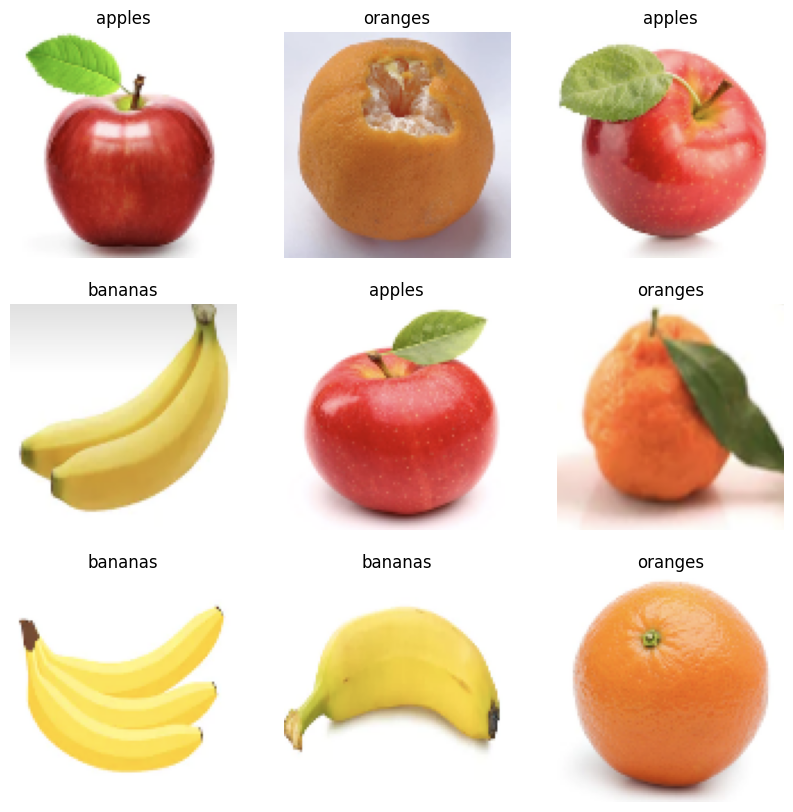

In [9]:
# Displaying the dataset (for our convienience)
class_names = ["apples", "bananas", "oranges"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9): # To display in a 3 by 3 grid
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [13]:
# Creating the model
model = tf.keras.Sequential(
    [
        tf.keras.layers.Rescaling(1./255), # .?
        #Create 3 Convolutional Layers
        tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        # Flattened Layer:
        tf.keras.layers.Flatten(),
        # One Denser Layer:
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(3) # Number of classes is 3 since Orange, Apple, Banana
    ]
)

In [14]:
# Compiling the model
model.compile(
    optimizer="adam",
    loss = tf.losses.SparseCategoricalCrossentropy(from_logits= True),
    metrics = ["accuracy"]
)

In [15]:
# Training the neural Network
model.fit(
    train_ds,
    validation_data= val_ds,
    epochs = 10,
)
# train is to train
# validation doesn't mean it will learn, but just confirm
# epochs is the number of times it goes through the dataset 

Epoch 1/10
23/23 [==============================] - 6s 201ms/step - loss: 0.7557 - accuracy: 0.6478 - val_loss: 0.4193 - val_accuracy: 0.7727
Epoch 2/10
23/23 [==============================] - 5s 200ms/step - loss: 0.3502 - accuracy: 0.8609 - val_loss: 0.1937 - val_accuracy: 0.9394
Epoch 3/10
23/23 [==============================] - 4s 161ms/step - loss: 0.1877 - accuracy: 0.9196 - val_loss: 0.1910 - val_accuracy: 0.9091
Epoch 4/10
23/23 [==============================] - 4s 156ms/step - loss: 0.1081 - accuracy: 0.9717 - val_loss: 0.0943 - val_accuracy: 0.9697
Epoch 5/10
23/23 [==============================] - 4s 161ms/step - loss: 0.1407 - accuracy: 0.9478 - val_loss: 0.1620 - val_accuracy: 0.9394
Epoch 6/10
23/23 [==============================] - 4s 168ms/step - loss: 0.0874 - accuracy: 0.9696 - val_loss: 0.0511 - val_accuracy: 0.9848
Epoch 7/10
23/23 [==============================] - 4s 152ms/step - loss: 0.1822 - accuracy: 0.9413 - val_loss: 0.1349 - val_accuracy: 0.9394
Epoch 

In [16]:
# now to evaluate our neural network
model.evaluate(test_ds)

7/7 [==============================] - 0s 29ms/step - loss: 0.1015 - accuracy: 0.9692


[0.10153289884328842, 0.9692307710647583]

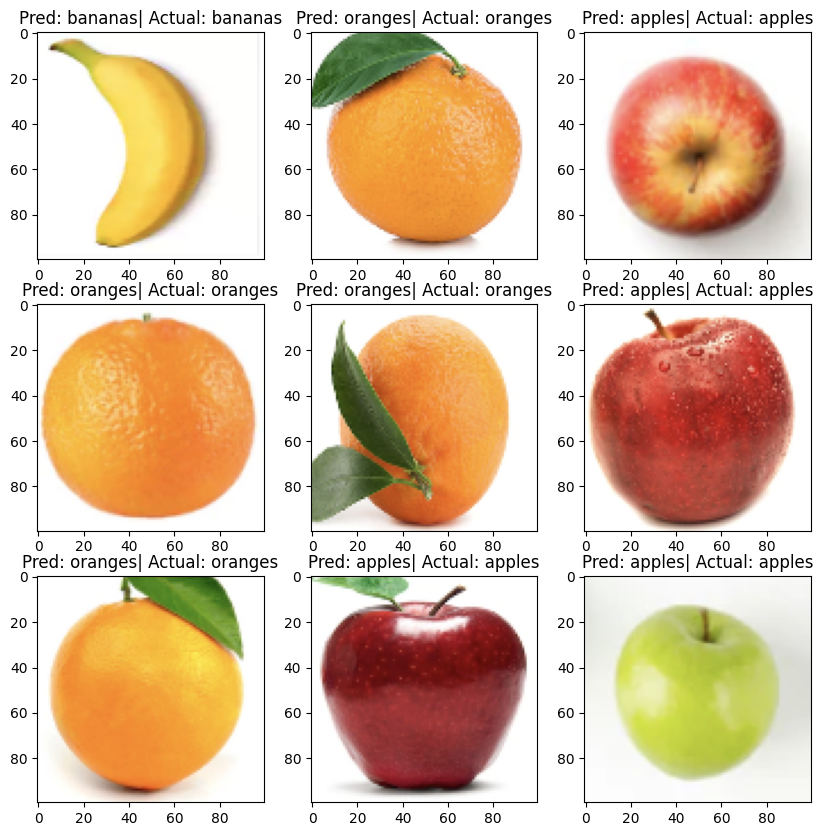

In [24]:
#Checking predictions
plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
    classifications = model(images)
    # print(classifications)

    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        index = np.argmax(classifications[i])
        plt.title(f"Pred: {class_names[index]}| Actual: {class_names[labels[i]]}")


# this is going to give us an array of arrays of tf.Tensorflow object. Each array has three columns - representing the three Classifications. 
# The Column with the highest value is the prediction of the program
# Columns are: Apples, Bananas, Oranges

In [25]:
# Now to convert our model into a tenserflowlitemodel
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
# now write it onto another file which we can then use later on
with open("model.tflite", "wb") as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\VRISHA~1\AppData\Local\Temp\tmpwiye4_i_\assets


INFO:tensorflow:Assets written to: C:\Users\VRISHA~1\AppData\Local\Temp\tmpwiye4_i_\assets


Found 0 files belonging to 0 classes.


ValueError: No images found in directory C:\Users\Vrishank J\OneDrive\Pictures\Screenshots\delete\. Allowed formats: ('.bmp', '.gif', '.jpeg', '.jpg', '.png')